<img src="https://www.sas.com/en_us/insights/big-data/data-visualization/_jcr_content/socialShareImage.img.png" alt="Explore the Power of Data using Visualization">

### <center> By: Harsh Yadav<center>

## <center>Analysis of Water Consumption in NYC from January 2017 to June 2018</center>

### <center>Data Set Obtained from NYC Open data Webste (https://opendata.cityofnewyork.us/)</center>

### Libraries Used:

* Pandas (https://pandas.pydata.org/)
* Numpy (https://www.numpy.org/)
* Matplotlib (https://matplotlib.org/)
* Seaborn (https://seaborn.pydata.org/)
* Plotly (https://plot.ly/python/)

#### Import pandas library to load a csv file from your computer to Jupyter Notebook into a pandas dataframe.

* Pandas DataFrame is two-dimensional size-mutable, tabular data structure with labeled axes (rows and columns). 
* A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

In [1]:
import pandas as pd
df_wc = pd.read_csv("C:/Users/Harsh/Desktop/ITP/Water_Consumption_NYC.csv")

#### View the first 2 rows of the datagrame using the head function

In [2]:
df_wc.head(2)

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (HCF),Water&Sewer Charges,Other Charges,BBL
0,FENIMORE-LEFFERTS,BROOKLYN,FENIMORE-LEFFERTS,BLD 09,AMR,BLD 09,205,322,K020500,FEDERAL,...,29,E20290493,N,128.28,Basic Water and Sewer,Yes,13,$128.28,$0.00,3048180028
1,LOWER EAST SIDE REHAB (GROUP 5),MANHATTAN,LOWER EAST SIDE REHAB (GROUP 5),BLD 01,AMR,"BLD 01, STORE 01-03",292,555,M029200,FEDERAL,...,31,G13031843,N,10509.31,Basic Water and Sewer,Yes,1065,"$10,509.31",$0.00,1003890038


#### Now we see the number of rows and columns present in our dataframe using the shape function

The dataset has:

* 3682 Rows
* 26 Columns

In [3]:
df_wc.shape

(3682, 26)

### Description of each column in our dataset:
 
#####  Borough
* Contains Boroughs in NYC.(Bronx, Brooklyn, Manhattan, Queens, or Staten Island)
##### Development Name
* The name of the housing development.
##### Location
* The building number of the meter provided by the State.
##### Meter AMR
* Is the meter Automatic Meter Reading (AMR), Interval or none
##### Meter Scope
* The buildings or areas the account and meter supplies water to.
##### TDS
* TDS (Tenant Data System) number is the unique identifier for all NCYHA developments.
##### EDP
* Electronic Data Processing. Number used to identify individual developments.
##### Funding Source
* The development’s funding source including Federal,Mixed Finance, or an indication that the facility is a non development facility which means a non residential facility.
##### AMP Number
* Asset Management Project (AMP) number.
##### Vendor Name
* Utility Vendor Name.
##### Account Number
* Utility Account number.
##### Revenue Month
* Year and month of bill.
##### Service Start Date
* Bill Start date.
##### Service End Date
* Bill End date.
##### Number Days
* Number of days on bill.
##### Meter Number
* Utility Meter Number.
##### Estimated
* The consumption and cost are estimated, for the time period meter was not measured.
##### Current Charges
* Total Costs.
##### Rate Class
* The rate applied to the account.
##### Bill Analyzed
* The bill was analyzed for billing errors by Utility Management system during the billing period
##### Consumption (HCF)
* Total HCF (Hundred Cubic Feet) consumption.
##### Water&Sewer Charges
* Total water & sewer charges.
##### Other Charges
* Total other charges.

### Next we use the numpy and Matplotlib library

##### Numpy Library
* Provides support for multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

##### Matplotlib Library
* Used to create 2-Dimensional graphs and plots using python.

# <center>Histograms</center>

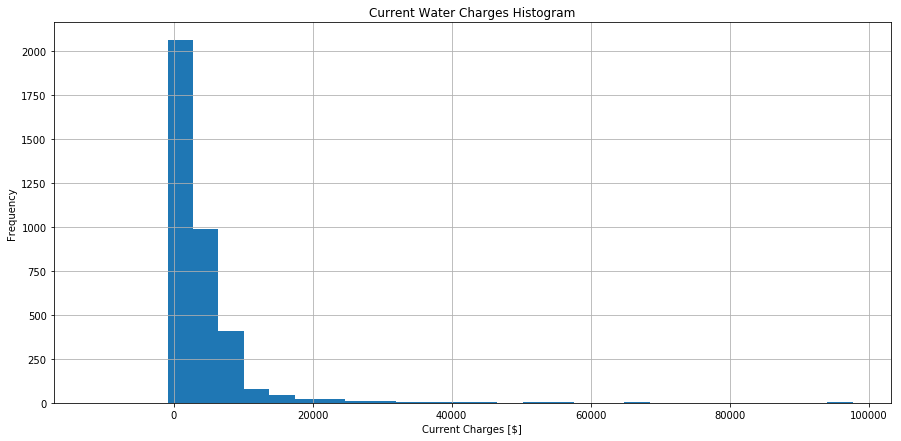

In [5]:
import numpy as np  
import matplotlib.pyplot as plt  

plt.figure(figsize=(15,7))
df_wc['Current Charges'].hist(bins=30) 

plt.xlabel('Current Charges [$]')                               # Label for X axis
plt.ylabel('Frequency')                                         # Label for Y axis
plt.title('Current Water Charges Histogram')                    # Graph Title
plt.show()

#### Performing basic manipulation on our dataframe

The column 'Water&Sewer' Charges has data that looks like $128.28 which is a string. We have to convert it to a number (float) for performing manipulations

In [6]:
df_wc['Water&Sewer Charges'] = df_wc['Water&Sewer Charges'].map(lambda x: x[1:])  # Remove $ sign from column elements
df_wc['Water&Sewer Charges'] = df_wc['Water&Sewer Charges'].str.replace(',','')   # Replace , with blank
df_wc['Water&Sewer Charges'] = df_wc['Water&Sewer Charges'].map(lambda x: float(x))  # Convert strings to float

#### Seaborn library for creating graphs

* Statistical data visualization library, based on matplotlib

##### Define the size of figure and mention the column for which we want the histogram to be plotted

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Water & Sewer Charges [$]')]

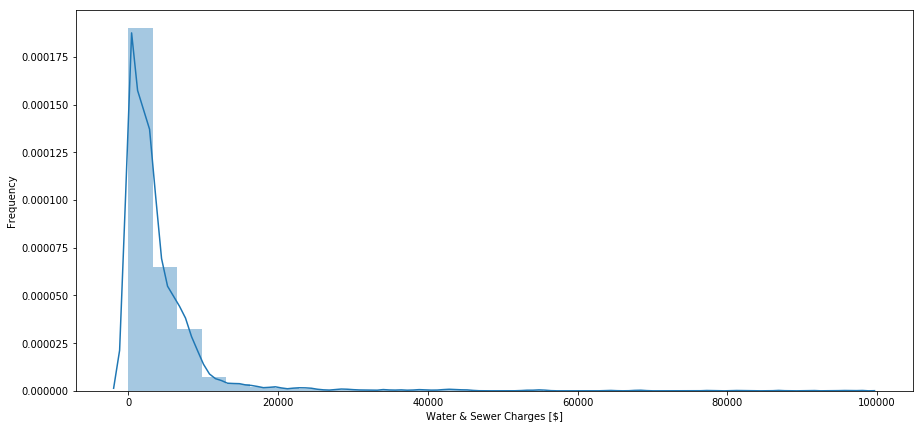

In [7]:
import seaborn as sns

plt.figure(figsize=(15,7))                                          # Defining the size of the graph
ax = sns.distplot(df_wc['Water&Sewer Charges'], bins=30)            # Bin defines the categories the data has to be divided in
ax.set(xlabel='Water & Sewer Charges [$]', ylabel='Frequency')      # Set x and y labels to be displayed on graph

#### More data manipulation for other columns

The elements in the column also contain brackets ( ) which have to be replaced with blank spaces to be converted into floating point numbers.

In [8]:
df_wc['Other Charges'] = df_wc['Other Charges'].str.replace('$','')
df_wc['Other Charges'] = df_wc['Other Charges'].str.replace(',','')
df_wc['Other Charges'] = df_wc['Other Charges'].str.replace('(','')
df_wc['Other Charges'] = df_wc['Other Charges'].str.replace(')','')
df_wc['Other Charges'] = df_wc['Other Charges'].map(lambda x: float(x))

#### Plotly Library (https://plot.ly/python/)

* Plotly is an interactive, open-source, and browser-based graphing library for Python.
* Graphs are defined as traces and then passed to library functions for creating graphs

##### Here we are again creating a hostogram of the Water & Sewer Charges against Current Charges and the overlaying them for comparison

In [9]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

trace1 = go.Histogram(
    x = df_wc['Current Charges'],  # Column for which histogram is to be plotted
    name = 'Current Charges',         # text to be displayed in legend
    opacity = 0.75,                   # opacity of each trace
    nbinsx = 40                       # Number of bins/categories in which data is to be divided
)
trace2 = go.Histogram(
    x=df_wc['Water&Sewer Charges'],
    name = 'Water & ewer Charges',
    opacity=0.75,
    nbinsx = 40
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='overlay',
    xaxis=dict(title='Values'),
    yaxis=dict(title='Frequency'),
    title='Histogram of Water & Sewer Charges against Current Charges')

fig = go.Figure(data=data, layout=layout)

iplot(go.Figure(data=fig))

# <center>Line Charts</center>

#### Line Chart Showing relation between Number of Properties in different Boroughs using Matplotlib library. (Not the best way)

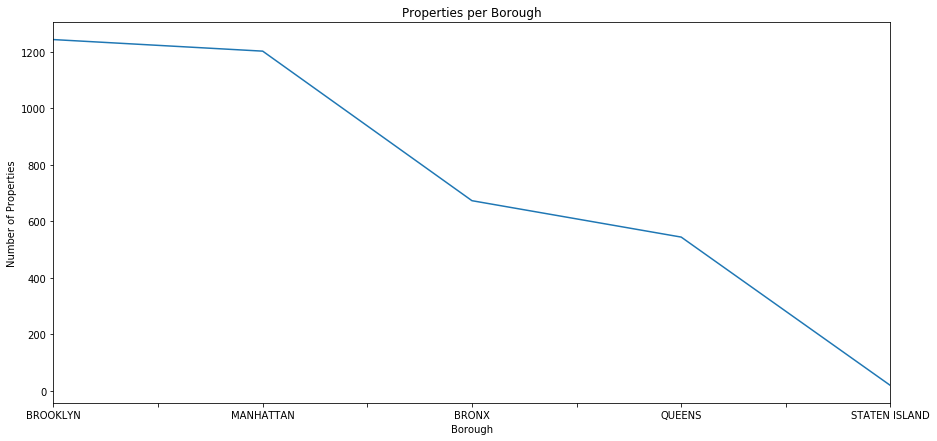

In [10]:
plt.figure(figsize=(15,7))

df_wc['Borough'].value_counts().plot()          # Count total properties in each borough and create graph
plt.xlabel('Borough')                              # Define x axis label
plt.ylabel('Number of Properties')                 # Define y axis label
plt.title('Properties per Borough')                # Define graph title
plt.show() 

# <center>Bar Charts</center>

#### Using seaborn library we plot the number of properties in each borough.

Seaborn library has a special function called countplot that counts the number of elements that belong to the same category and plots them

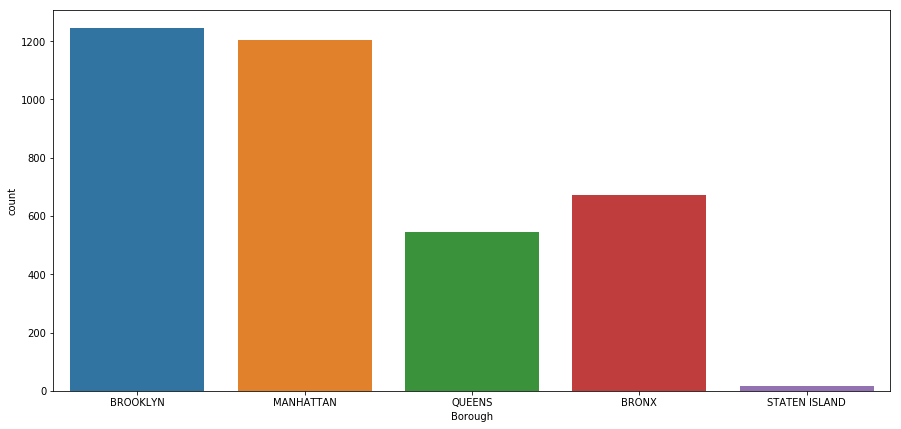

In [11]:
import seaborn as sns

plt.figure(figsize=(15,7))
ax = sns.countplot(df_wc['Borough'],label="Count") 

#### Bar Plot showing number of properties contributed by each funding source

In [12]:
import warnings
warnings.filterwarnings('ignore')

trace = go.Histogram(x=df_wc['Funding Source'], xbins=dict())

layout = go.Layout(
    title="Contribution by each Funding Source",
    yaxis=dict(title='Count'),
    xaxis=dict(title='Funding Source')
)

fig = go.Figure(data=go.Data([trace]), layout=layout)

iplot(go.Figure(data=fig))

#### Date Time manipulations using pandas to_datetime function

In [13]:
df_wc['Service End Date'] = pd.to_datetime(df_wc['Service End Date'])

# <center>Scatter Plots</center>

#### Scatter plot showing total water consumption in Hundred Cubic feet (HCF) during the time period 2017 -2018 

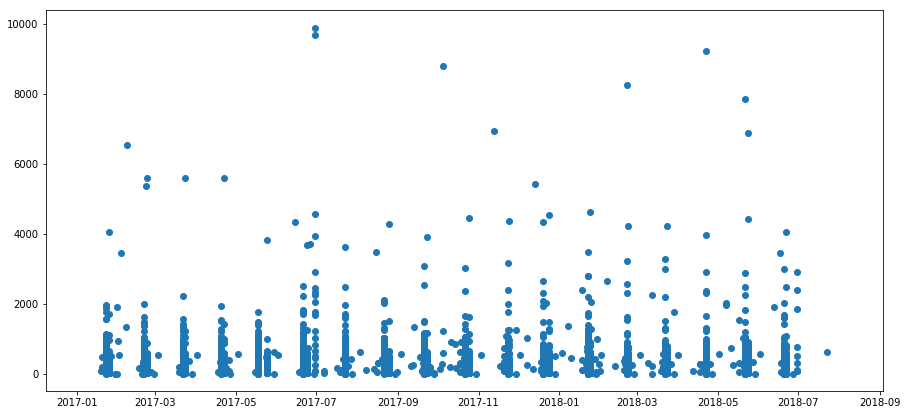

In [14]:
plt.figure(figsize=(15,7))
plt.scatter(df_wc['Service End Date'],df_wc['Consumption (HCF)'])
plt.show()

#### Creating indivisual dataframes containg data for each Borough for more informative graphs

In [15]:
dfManhattan = df_wc[df_wc.Borough=='MANHATTAN']
dfBronx = df_wc[df_wc.Borough=='BRONX']
dfQueens = df_wc[df_wc.Borough=='QUEENS']
dfBrooklyn = df_wc[df_wc.Borough=='BROOKLYN']
dfStatenIsland = df_wc[df_wc.Borough=='STATEN ISLAND']

In [16]:
fig = {
    'data': [
          {
            'x': dfManhattan['Service End Date'],   # X axis data
            'y': dfManhattan['Consumption (HCF)'],  # Y axis data
            'text': dfManhattan['Account Name'],    # Data represented on hover on tooltip
            'mode': 'markers',                      # Data points representation as markers
            'name': 'Manhattan'},                   # Data label to be represented for this category
        {
            'x': dfBronx['Service End Date'], 
            'y': dfBronx['Consumption (HCF)'], 
            'text': dfBronx['Account Name'], 
            'mode': 'markers', 
            'name': 'Bronx'},
        {
            'x': dfQueens['Service End Date'], 
            'y': dfQueens['Consumption (HCF)'], 
            'text': dfQueens['Account Name'], 
            'mode': 'markers', 
            'name': 'Queens'},
        {
            'x': dfBrooklyn['Service End Date'], 
            'y': dfBrooklyn['Consumption (HCF)'], 
            'text': dfBrooklyn['Account Name'], 
            'mode': 'markers', 
            'name': 'Brooklyn'},
        {
            'x': dfStatenIsland['Service End Date'], 
            'y': dfStatenIsland['Consumption (HCF)'], 
            'text': dfStatenIsland['Account Name'], 
            'mode': 'markers', 
            'name': 'Staten Island'},
    ],
    'layout': {
        'xaxis': {'title': 'Date Time'},
        'yaxis': {'title': "Water Consumption Per Borough"}
    }
}


iplot(go.Figure(data=fig))

#### 3-Dimensional graph representing water consumption in each borigh ober the time period from 2017 to 2018.

Uses plotly library to create a 3-D graph with the color scheme of data tha can be defined using rgb color scheme. This means that for each category of value we have a different color representing values (eg: low as red, medius as yellow ang high as green). 

Different color schemes can be obtained from (https://www.w3schools.com/colors/colors_rgb.asp)

In [17]:
data = []

trace = dict(
   
    x = df_wc['Service End Date'], y = df_wc['Borough'], z = df_wc['Current Charges'],
    type = "scatter3d",    
    mode = 'markers',
    marker = dict( size=4, color= df_wc['Consumption (HCF)'], colorscale='Portland', line=dict(width=0) ) )
data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Water Consumption Per Borough from 2017-2018',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)
iplot(go.Figure(data=fig))

#### More Color Scales:

‘Blackbody’,
‘Bluered’,
‘Blues’,
‘Earth’,
‘Electric’,
‘Greens’,
‘Greys’,
‘Hot’,
‘Jet’,
‘Picnic’,
‘Portland’,
‘Rainbow’,
‘RdBu’,
‘Reds’,
‘Viridis’,
‘YlGnBu’,
‘YlOrRd’